# This Week 2 Questions
Notebook is a part of FREE ML course by Glexey Grigorev. [List Of The Questions](https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/course-zoomcamp/02-regression/homework.md)

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading and Reading Data 

In [2]:
df = pd.read_csv('../input/new-york-city-airbnb-open-data/AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## Look at the price variable. Does it have a long tail?

Text(0.5, 1.0, 'Logarithmic scale Price')

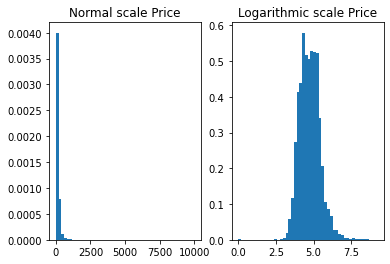

In [3]:
"""
Look at the price variable. Does it have a long tail?
"""
fig, axes = plt.subplots(1, 2)
      
axes[0].hist(df['price'], density= True, bins = 50)
axes[0].set_title("Normal scale Price")

axes[1].hist(np.log1p(df['price']), density= True, bins = 50)
axes[1].set_title("Logarithmic scale Price")

## Features used for this Project

In [9]:
features  = ['latitude',
'longitude',
'price',
'minimum_nights',
'number_of_reviews',
'reviews_per_month',
'calculated_host_listings_count',
'availability_365']

df[features]

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,149,1,9,0.21,6,365
1,40.75362,-73.98377,225,1,45,0.38,2,355
2,40.80902,-73.94190,150,3,0,NaN,1,365
3,40.68514,-73.95976,89,1,270,4.64,1,194
4,40.79851,-73.94399,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...
48890,40.67853,-73.94995,70,2,0,NaN,2,9
48891,40.70184,-73.93317,40,4,0,NaN,2,36
48892,40.81475,-73.94867,115,10,0,NaN,1,27
48893,40.75751,-73.99112,55,1,0,NaN,6,2


In [11]:
"""Checking description of this project's data set"""
df[features].describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


# Q1. Find a feature with missing values. How many missing values does it have?

In [23]:
missing_vals = df[features].isnull().sum()
missing_vals.to_frame().reset_index().rename({'index': 'Variables', 0: 'Missing Values'}, axis = 1).sort_values(by = 'Missing Values', ascending = False).head(2)

,Variables,Missing Values
5,reviews_per_month,10052
0,latitude,0


# Q2. What's the median (50% percentile) for variable 'minimum_nights'?
        Split the data
        - Shuffle the initial dataset, use seed 42.
        - Split your data in train/val/test sets, with 60%/20%/20% distribution.
        - Make sure that the target value ('price') is not in your dataframe.
        - Apply the log transformation to the price variable using the np.log1p() function.

In [13]:
print("Median for variable 'minimum_nights': %s" %(np.median(df[features]['minimum_nights'])))

Median for variable 'minimum_nights': 3.0


In [14]:
def train_test_split(df,test_split = 0.2, val_split = 0.2, random_seed = 42):
    """Shuffling"""
    n = len(df)                                                         # Total number of IDs to be generated
    idx = np.arange(n)                                                  # Generating IDs
    np.random.seed = random_seed                                        # Setting random Seed to 42
    np.random.shuffle(idx)                                              # Initial Dataset Ids Shuffled

    """Split your data in train/val/test sets, with 60%/20%/20% distribution."""
    n = len(df)
    n_val = int(n * val_split)                                           # Number of validation values
    n_test = int(n * test_split)                                         # Number of Test Set values
    n_train = n - n_val - n_test                                         # Number of Train set Values

    df_train = df.iloc[idx[:n_train]]                                    # Creating Train set    
    df_val = df.iloc[idx[n_train:n_train + n_val]]                       # Creating Validation Set
    df_test = df.iloc[idx[n_train+n_val:]]                               # Creating Test Set

    """Dropping indexes now"""
    df_train = df_train.reset_index(drop = True)
    df_val = df_val.reset_index(drop = True)
    df_test = df_test.reset_index(drop = True)

    """Apply the log transformation to the price variable using the np.log1p() function."""
    y_train = np.log1p(df_train['price'].values)
    y_val = np.log1p(df_val['price'].values)
    y_test = np.log1p(df_test['price'].values)

    """Make sure that the target value ('price') is not in your dataframe."""
    del df_train['price']
    del df_val['price']
    del df_test['price']
    
    return df_train, df_val, df_test, y_train, y_val, y_test

df_train, df_val, df_test, y_train, y_val, y_test= train_test_split(df[features])

# Q3. 
        - We need to deal with missing values for the column from Q1.
        - We have two options: fill it with 0 or with the mean of this variable.
        - Try both options. For each, train a linear regression model without regularization using the code from the lessons.
        - For computing the mean, use the training only!
        - Use the validation dataset to evaluate the models and compare the RMSE of each option.
        - Round the RMSE scores to 2 decimal digits using round(score, 2)
        - Which option gives better RMSE?

In [15]:
"""Imputing Missing values with 0"""
def train_X_imputing_0(df):
    df = df.fillna(0)
    X = df.values
    return X

"""Imputing Missing values with Mean"""
def train_X_imputing_mean(df):
    df = df.fillna(0)
    X = df.values
    return X

In [16]:
"""Creating a function for Training Linear Regression Model"""
def train_linear_regression_reg(X,y,r = 0.01):
    """
    Including a biased term
    """
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    """
    Gram Matrix
    """
    XTX = X.T.dot(X)
    
    """Regularization"""
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    
    """inverse of Gram Matrix"""
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:] 

def rmse(y, y_pred):
    error = y - y_pred
    squared = error ** 2
    mean_squared = squared.mean()
    return np.sqrt(mean_squared)

In [25]:
"""Model and Prediction with missing value imputation using 0"""
X_train = train_X_imputing_0(df_train)

w0,w = train_linear_regression_reg(X_train,y_train,r = 0)

# Predicting on Validation set
y_pred_train = w0 + X_train.dot(w)

# Predicting on Validation set
X_val = train_X_imputing_0(df_val)
y_pred_val = w0 + X_val.dot(w)

# rmse
print("RMSE_train with 0: %s" %rmse(y_train, y_pred_train).round(2))
print("RMSE_valid with 0: %s" %rmse(y_val, y_pred_val).round(2))


"""Model and Prediction with missing value imputation using mean"""
X_train = train_X_imputing_mean(df_train)

w0,w = train_linear_regression_reg(X_train,y_train, r = 0)
# Predicting on Training set
y_pred_train = w0 + X_train.dot(w)

# Predicting on Validation set
X_val = train_X_imputing_mean(df_val)
y_pred_val = w0 + X_val.dot(w)

# rmse
print("RMSE_train with mean: %s" %rmse(y_train, y_pred_train).round(2))
print("RMSE_valid with mean: %s" %rmse(y_val, y_pred_val).round(2))

RMSE_train with 0: 0.65
RMSE_valid with 0: 0.64
RMSE_train with mean: 0.65
RMSE_valid with mean: 0.64


# Q4. 
        - Now let's train a regularized linear regression.
        - For this question, fill the NAs with 0.
        - Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
        - Use RMSE to evaluate the model on the validation dataset.
        - Round the RMSE scores to 2 decimal digits.
        - Which r gives the best RMSE?
        - If there are multiple options, select the smallest r.

In [27]:
for r in [0.0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1]:
    w0,w = train_linear_regression_reg(X_train,y_train,r)
    
    
    # Predicting on Validation set
    X_val = train_X_imputing_0(df_val)
    y_pred = w0 + X_val.dot(w)
    score =  (rmse(y_val, y_pred))
    # rmse
    print("r: %s, w0: %s, score: %s" %(r, w0, score))

r: 0.0, w0: -427.13535302136677, score: 0.6362154812476201
r: 1e-06, w0: -427.0836648736245, score: 0.6362155781650796
r: 0.0001, w0: -422.02777116136673, score: 0.6362309011540949
r: 0.001, w0: -381.0222087234855, score: 0.6367823261369248
r: 0.01, w0: -193.2517874805587, score: 0.6489028392621478
r: 0.1, w0: -32.59824904366397, score: 0.6712113120018434
r: 1, w0: -3.498863153626388, score: 0.6763492607224622


# Q5.
        - We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
        - Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
        - For each seed, do the train/validation/test split with 60%/20%/20% distribution.
        - Fill the missing values with 0 and train a model without regularization.
        - For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
        - What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
        - Round the result to 3 decimal digits (round(std, 3))
Note: Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is stable.

In [20]:
score = []
for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    df_train, df_val, df_test, y_train, y_val, y_test= train_test_split(df[features], random_seed = s)
    
    """Model and Prediction with missing value imputation using 0"""
    X_train = train_X_imputing_0(df_train)

    w0,w = train_linear_regression_reg(X_train,y_train,r=0)

    # Predicting on Validation set
    X_val = train_X_imputing_0(df_val)
    y_pred = w0 + X_val.dot(w)
    
#     RMSE Scores
    score.append(rmse(y_val, y_pred).round(2))
    print("seed: %s, w0: %s, score: %s" %(s, w0, score[s]))
print("Standard Deviation of Scores: %s" %np.std(score).round(3))

seed: 0, w0: -424.08563207567596, score: 0.66
seed: 1, w0: -432.74680144462445, score: 0.64
seed: 2, w0: -420.32522113461033, score: 0.64
seed: 3, w0: -422.2726863043103, score: 0.65
seed: 4, w0: -425.9535107532854, score: 0.64
seed: 5, w0: -428.21100364394306, score: 0.66
seed: 6, w0: -431.6689032747808, score: 0.65
seed: 7, w0: -432.75512860259477, score: 0.65
seed: 8, w0: -421.6226153408139, score: 0.65
seed: 9, w0: -429.05647645664493, score: 0.65
Standard Deviation of Scores: 0.007


# Q6.
        - Split the dataset like previously, use seed 9.
        - Combine train and validation datasets.
        - Fill the missing values with 0 and train a model with r=0.001.
        - What's the RMSE on the test dataset?

In [21]:
df_train, df_val, df_test, y_train, y_val, y_test= train_test_split(df[features], random_seed = 9)


"""Combining Train and Validation set"""
df_train_full = pd.concat([df_train, df_val])
df_train_full = df_train_full.reset_index(drop = True)



"""Model and Prediction with missing value imputation using 0"""
X_train_full = train_X_imputing_0(df_train_full)
y_full_train = np.concatenate([y_train, y_val])


w0,w = train_linear_regression_reg(X_train,y_train, r = 0.001)

# Predicting on Validation set
X_test = train_X_imputing_0(df_test)
y_pred = w0 + X_test.dot(w)

#     RMSE Scores
score =rmse(y_test, y_pred)
print("seed: %s, w0: %s, score: %s" %(s, w0, score))

seed: 9, w0: 2.1330477212028836, score: 0.6924355319863306
